In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
%matplotlib inline

In [7]:
df = pd.read_csv('../../data/telecom_churn.csv')

In [8]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# 1.Признаки по одному
# 1.1 Колич.


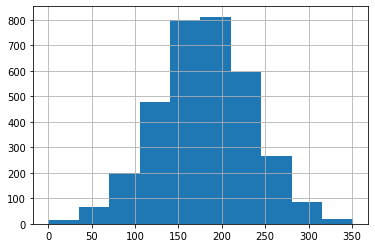

In [9]:
df['Total day minutes'].hist()

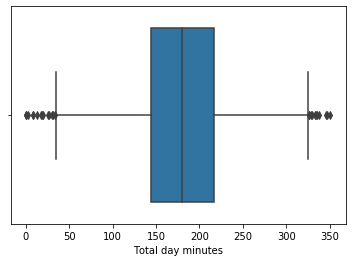

In [10]:
sns.boxplot(df['Total day minutes']);

# 1.2 Катигор. (Штат)


In [11]:
df['Churn'].value_counts()

AttributeError: 'Series' object has no attribute 'unicue'

In [ ]:
sns.countplot(df['State'])

In [ ]:
sns.countplot(df['Churn'])

In [ ]:
sns.countplot(df[df['State'].isin(df['State'].value_counts().head().index)]['State']);

# 2. Взаимодействия признаков
# 2.1 Колич-колич

In [ ]:

feat = [f for f in  df.columns if 'charge' in f]

In [ ]:
feat

In [ ]:
df[feat].hist();

In [ ]:
sns.pairplot(df[feat]);

## Диагарама рассеивания 2 признаков

In [ ]:
df['Churn'].map({False: 'green', True: 'red'}) # меняем фолс и тру на цвета


plt.scatter(df[df['Churn']]['Total eve charge'], 
            df[df['Churn']]['Total intl charge'],
           color='orange',
           label='churn')
plt.scatter(df[~df['Churn']]['Total eve charge'], 
            df[~df['Churn']]['Total intl charge'],
           color='blue',
           label='loyal')
plt.xlabel('Вечерние начисления')
plt.ylabel('Межнародные начисления')
plt.title('Распредиление для ушедших/лояльных')
plt.legend();

# Колиряция

In [ ]:
sns.heatmap(df.corr())

## Сверху мы увидели что например Churn колерирует с Total day minutes

# Удаление из датафрейма

In [ ]:
df.columns

In [ ]:
df.drop(feat, axis=1, inplace=True)

In [ ]:
df.columns

# 2.2 Колич-катег + колич-бинар
### (Например как зарплата зависит от пола)

In [ ]:
sns.boxplot(x='Churn', y='Total day minutes', data=df);
# Количественный - Total day minutes
# Бинарный - Churn

### Медиана в боксплотах отличается (линия на сасмом квадрате). Значит медианы проговореных дневных минут сильно отличаются у ушедших и у лояльных. Значит те кто ушли говорили очень много днем
### Churn - True - Ушедший. 

In [ ]:
sns.boxplot(x='Churn', y='Customer service calls', data=df);


### ^Построили такую же зависимость только с другим качественным признаком

In [ ]:
d = df[df['State'].isin(df['State'].value_counts().head().index)]
sns.boxplot(x='State', y='Total day minutes', data=d);

### ^Узнали зависимость звонков и самых популярных штатах

In [ ]:
sns.boxplot(x='State', y='Total day minutes', data=d);

# 2.3 Катег-катег

In [ ]:
#пример отношения в pandas
pd.crosstab(df['Churn'], df['International plan'])

In [ ]:
#Тоже самое в sns
sns.countplot(x='International plan', hue='Churn', data=df)

### ^Значит те у кого пдключен роуминг чаще уходят

# 3. Реализация t-SNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(random_state=0)

### Sklearn не может работать со строковыми типами, поэотму булевые знач нужно преобразовать, а штаты выкинуть

In [ ]:
df2 = df.drop('State', axis=1)

In [ ]:
df2['International plan']= df2['International plan'].map({'Yes': 1, 'No': 0})
df2['Voice mail plan']= df2['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [ ]:
tsne.fit(df2)

In [ ]:
plt.scatter(tsne.embedding_[:, 0], tsne.embedding_[:, 1]);

## Отображение из 15-мерного пространства на плоскость

In [ ]:
plt.scatter(tsne.embedding_[df['Churn'].values, 0], tsne.embedding_[df['Churn'].values, 1], color='orange');
plt.scatter(tsne.embedding_[~df['Churn'].values, 0], tsne.embedding_[~df['Churn'].values, 1], color='blue');

In [ ]:
df['Churn'].values
#получили нампай вектор с помощью .values